In [2]:
import pandas as pd
import numpy as np
import ast

import matplotlib.pyplot as plt

/Users/dan/.matplotlib is not a writable directory
Matplotlib created a temporary cache directory at /var/folders/6p/bshr1_dj3_7_gk1krflr4lzm0000gn/T/matplotlib-0wptnr4b because there was an issue with the default path (/Users/dan/.matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


In [3]:
# Тренировочный датасет
data = pd.read_csv('train_data.csv')

data.head()

,id,annotation,tags,text
0,doc_001,Светлана из Казани дает частные уроки английск...,"['Начать бизнес', 'Самозанятые', 'Свое дело', ...",## Кто такой самозанятый?\n\nПо закону самозан...
1,doc_002,"Елене назначили социальное пособие на ребенка,...","['Защитить права', 'Банки', 'Банковская карта'...",Первым делом нужно попросить банк проверить ма...
2,doc_003,Самый надежный способ не оказаться в долгах — ...,"['Кредиты', 'Долги', 'Просрочки', 'Ипотека', '...",## Не переоценивайте свои финансовые возможнос...
3,doc_004,"Друзья Александра то и дело хвастаются, что по...","['Инвестиции', 'Ценные бумаги', 'Фондовая бирж...",Просто прийти на биржу и купить ценные бумаги ...
4,doc_005,Вы взяли в микрофинансовой организации заем на...,"['Займы', 'Долги', 'Риски', 'Защитить права']","## МФО больше нет в госреестре. Значит, она за..."


## Примеры

In [95]:
# Пример
example = data.loc[0]

for key in example.keys():
    print(f'key: {key}, value:')
    print(example[key], '='*20, sep='\n')

key: id, value:
doc_001
key: annotation, value:
Светлана из Казани дает частные уроки английского языка. Она неплохо зарабатывает, но весь ее доход — неофициальный. Из-за этого ей сложно получить кредит и визу в другую страну. Но недавно Светлана узнала, что можно получить статус самозанятого, платить небольшой налог — и проблем со справками о доходе не будет.Рассказываем, кто может зарегистрироваться как самозанятый и для чего это делать.
key: tags, value:
['Начать бизнес', 'Самозанятые', 'Свое дело', 'Налоги']
key: text, value:
## Кто такой самозанятый?

По закону самозанятый — это человек, который платит специальный **налог на профессиональный доход** (НПД). При этом не нужно дополнительно отчислять подоходный налог или налог на прибыль.

Получить статус самозанятого могут россияне и проживающие в РФ граждане Армении, Казахстана, Киргизии, Беларуси и Украины.

Оформить самозанятость вправе даже подростки с 14 лет, если они получили согласие родителей.

## Сколько составляет налог на

In [12]:
# Пример
example = data.loc[1]

for key in example.keys():
    print(f'key: {key}, value:')
    print(example[key], '='*20, sep='\n')

key: id, value:
doc_002
key: annotation, value:
Елене назначили социальное пособие на ребенка, но банк списал часть этой суммы в счет уплаты долга по кредитке. Разбираемся, почему это могло произойти и может ли Елена вернуть деньги.
key: tags, value:
['Защитить права', 'Банки', 'Банковская карта', 'Риски', 'Долги']
key: text, value:
Первым делом нужно попросить банк проверить маркировку списанных выплат. Пособиям, алиментам и другим видам социальных начислений должен быть присвоен особый код дохода: код 2 для регулярных соцвыплат и код 4 для разовых. Поступления с такими пометками банки не вправе списывать без вашего согласия.

Шансы на возврат зависят от того, была ли у пособия маркировка и верна ли она.

## 1. Код дохода указан верно

Если в маркировке платежа нет ошибок, то вы можете оспорить списание в банке.

Соцвыплаты с кодом 4 банкам вообще запрещено трогать. Начисления с кодом 2 кредитор имеет право списать, если вы позволили ему снимать деньги с любых ваших счетов в счет пога

In [96]:
# Пример
example = data.loc[3]

for key in example.keys():
    print(f'key: {key}, value:')
    print(example[key], '='*20, sep='\n')

key: id, value:
doc_004
key: annotation, value:
Друзья Александра то и дело хвастаются, что поднимают деньги на ценных бумагах. Все вокруг убеждают его, что это гораздо выгоднее депозитов. Но Александр никогда раньше не инвестировал и плохо разбирается в фондовом рынке. Рассказываем, как ему может пригодиться доверительное управление.
key: tags, value:
['Инвестиции', 'Ценные бумаги', 'Фондовая биржа', 'Акции', 'Облигации', 'Как выбрать']
key: text, value:
Просто прийти на биржу и купить ценные бумаги невозможно. Александру обязательно понадобится профессиональный посредник — брокер или доверительный управляющий, у которых есть лицензия Банка России.

Брокер совершает сделки по указаниям клиента. В таком случае именно Александр должен будет следить за ситуацией на бирже и принимать решения, когда и какие ценные бумаги покупать и в какой момент их продавать. О других участниках рынка ценных бумаг, без которых инвестору не обойтись, и особенностях их работы читайте в статье «Как устроена 

In [5]:
import torch
torch.__version__


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/dan/miniconda3/envs/raif_hack/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/dan/miniconda3/envs/raif_hack/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/dan/miniconda3/envs/raif_hack/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 758, in start
  

'2.2.2'

In [4]:
rand_idx = np.random.choice(data.index)
# Пример
example = data.loc[rand_idx]

for key in example.keys():
    print(f'key: {key}, value:')
    print(example[key], '='*20, sep='\n')

key: id, value:
doc_056
key: annotation, value:
Светлана и Николай решили взять кредит на покупку квартиры. Но опасались получить отказ в банке, так как не все свои доходы они могли подтвердить документами. Риелтор посоветовал им обратиться к кредитному брокеру. По его словам, брокер поможет выбрать «сговорчивый» банк и обеспечить нужными документами. Рассказываем, кто такой кредитный брокер и стоит ли на него рассчитывать.
key: tags, value:
['Кредиты', 'Долги', 'Риски', 'Мошенничество', 'Кредитная история']
key: text, value:
## Кто такие кредитные брокеры?

Это посредники между банками и потенциальными заемщиками.

Кредитные брокеры могут:

* составить список банков по вашим критериям, например, с невысокими ставками по ипотеке и большой сетью банкоматов, в которых можно вносить платежи без комиссии;
* помочь собрать пакет документов для кредита;
* разослать ваше заявление по нескольким банкам и микрофинансовым организациям (МФО);
* исходя из собственного опыта рассказать, в каких орг

## Annotation

Присутсвуют пропуски

In [62]:
# Вывод примеров с отсутсвующей аннотацией 
for row_id in range(len(data)):
    row = data.loc[row_id]

    if row['annotation'] is np.nan:
        print(row)
        print('===='*15)

id                                                      doc_105
annotation                                                  NaN
tags          ['Финансы для детей', 'Финансовые цели', 'План...
text          ## Почему важно говорить с детьми о финансах?\...
Name: 104, dtype: object
id                                                      doc_173
annotation                                                  NaN
tags          ['Лайфхаки', 'Планирование', 'Финансовые цели'...
text          ## Открыть депозит\n\nНовогодняя суета отнимае...
Name: 172, dtype: object
id                                                      doc_232
annotation                                                  NaN
tags                 ['Ипотека', 'Финансовые решения', 'Риски']
text          ## Что такое долевое строительство?\n\nКвартир...
Name: 231, dtype: object
id                                                      doc_333
annotation                                                  NaN
tags          ['Начать бизнес

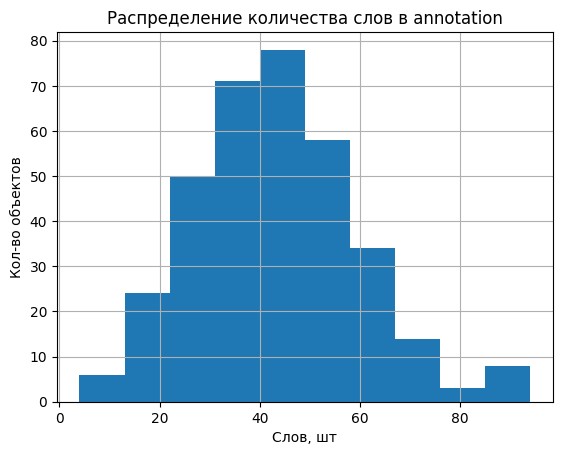

In [53]:
# annotation
annotation_len = pd.Series([len(row.split(' ')) for row in data['annotation'] if row is not np.nan])
annotation_len.hist()

plt.title('Распределение количества слов в annotation')
plt.xlabel('Слов, шт')
plt.ylabel('Кол-во объектов')

plt.show()

## Tags

In [66]:
# Проверка пропусков
assert data['tags'].count() == len(data), 'Пропуски в данных'

In [101]:
# str -> list[str]
data['tags_list'] = data['tags'].apply(lambda x: ast.literal_eval(x))

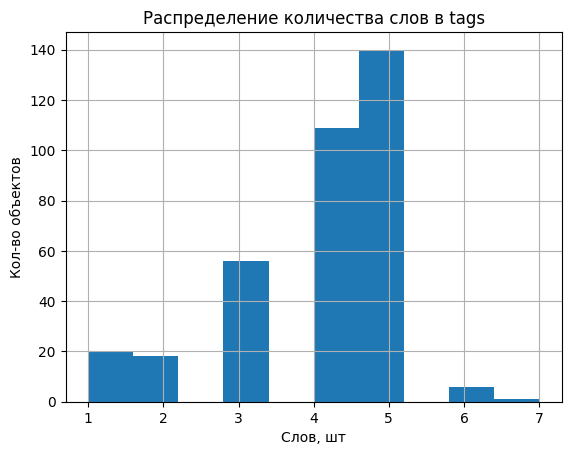

In [102]:
row_len = pd.Series([len(row) for row in data['tags_list']])
row_len.hist()

plt.title('Распределение количества слов в tags')
plt.xlabel('Слов, шт')
plt.ylabel('Кол-во объектов')

plt.show()

## Text

In [93]:
# Проверка пропусков
assert data['text'].count() == len(data), 'Пропуски в данных'

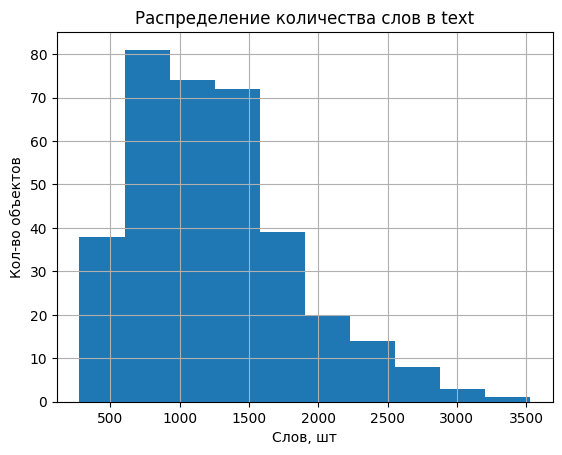

In [94]:
text_len = pd.Series([len(row.split(' ')) for row in data['text']])
text_len.hist()

plt.title('Распределение количества слов в text')
plt.xlabel('Слов, шт')
plt.ylabel('Кол-во объектов')

plt.show()

## Итоги

1) **Отсутсвует аннотация** - предлагаю заполнить пропуски при помощи генеративной модельки 

2) **Text** - Есть мета-информация, которую надо удалить: "Обновлено 05.10.2022 в 12:59"

3) **Text** - предварительно структура имеет ряд вопросов после  ## и далее ответы на них, на основе этого  нужно принять решение о чанкинге текста